$$f(x,y) = x(y-10)+(\frac{x^2}{4}-\frac{x^4}{2}+\frac{x^6}{6})-(\frac{y^2}{4}-\frac{y^4}{2}+\frac{y^6}{6})$$

$$F = (y-10+\frac{x}{2}-2x^3+x^5, x-\frac{y}{2}+2y^3-y^5)$$


$$\nabla F =
\left(\begin{array}
2\frac{1}{2}-6x^2+5x^4 & 1\\
-1 & \frac{1}{2}-6y^2+5y^4
\end{array}\right)
$$

In [99]:
import numpy as np

In [100]:
import matplotlib.pyplot as plt

In [151]:
def oracle_1(x,y):
    gx = y-1.5+x/2-2*x**3+x**5
    gy = x-y/2+2*y**3-y**5
    F = [gx,-gy]
    return(F)

def oracle_2(x,y):
    gxx = 1/2-6*x**2+5*x**4
    gxy = 1
    gyy = 1/2-6*y**2+5*y**4
    nabla_F = np.zeros((2,2))
    nabla_F[0][0] = gxx
    nabla_F[0][1] = gxy
    nabla_F[1][0] = -gxy
    nabla_F[1][1] = gyy

    return(nabla_F)

In [152]:
#initialize iterates
x_init,y_init = 0.5,0.5

def iteration(x,y,delta):
    #set parameters
    l = 0
#     delta = 0.1

    norm_F = np.linalg.norm(oracle_1(x_init,y_init))
    u = norm_F/delta

    nu = delta*u**2/norm_F

    lambd = (l+u)/2
    lambda_m = lambd-nu

    #prepare loop
    A_1 = oracle_2(x,y)
    A_1[0][0] += lambd
    A_1[1][1] += lambd
    
    A_2 = oracle_2(x,y)
    A_2[0][0] += lambda_m
    A_2[1][1] += lambda_m
    
    temp_1 = np.linalg.norm(np.linalg.solve(A_1,oracle_1(x_init,y_init)))
    temp_2 = np.linalg.norm(np.linalg.solve(A_2,oracle_1(x_init,y_init)))


    while (not temp_1 <= lambd) and (temp_2> lambda_m):
        if lambd <= delta*u**2/norm_F:
            
            break
        if temp_1 <= lambd:
            u = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
        else:
            l = lambd
            lambd = (l+u)/2
            lambda_m = lambd-nu
            A_1 = oracle_2(x,y)
            A_1[0][0] += lambd
            A_1[1][1] += lambd
    return([x,y]-np.linalg.solve(A_1,oracle_1(x_init,y_init)))

#                                                               $\tau$

\begin{equation}\label{eq:tau-def}
    \tau_p(z_{k+\frac{1}{2}},z_k) :=  \sum_{i=0}^p \nabla^i F(z_k)[z_{k+\frac{1}{2}}-z_k]^i
\end{equation}

$\Phi$

\begin{equation}\label{eq:phi-def}
    \Phi_p(z_{k+\frac{1}{2}},z_k) :=   \tau_{p-1}(z_{k+\frac{1}{2}},z_k) +\frac{2L_p}{p!}\|z_{k+\frac{1}{2}}-z_k\|^{p-1}(z_{k+\frac{1}{2}}-z_k) ,
\end{equation}

## Algorithm

\begin{equation}\label{alg:higher1}\tag{HOMVI}
\begin{gathered}
    z_{k+\frac{1}{2}} = z' : \Phi(z',z_k)=0\\
    \lambda_k = \frac{1}{2}\|z_{k+\frac{1}{2}} - z_k\|^{1-p}
    \\
    z_{k+1} = argmin_{z'' \in R^d} \Big\{ <{F(z_{k+\frac{1}{2}}), z'' - z_{k+\frac{1}{2}}}> + \frac{L_p}{p!\lambda_k}\|z_{k}'' - z_k\|^2\Big\} = z_k - \frac{p!\lambda_k}{L_p} F(z_{k+\frac{1}{2}})\\
    Return~z_{k+\frac{1}{2}}
\end{gathered}    
\end{equation}

For p=2: $z_{k+\frac{1}{2}} = z' : F(z_k)+\nabla F(z_k)(z_{k+\frac{1}{2}}-z_k)+2\frac{L_p}{p!}\|z_{k+\frac{1}{2}}-z_k\|(z_{k+\frac{1}{2}}-z_k)=0$

$<a,b+c>\leq \|a\|\|b+c\| \leq 1/2\|a\|^2+1/2\|b+c\|^2 \leq 1/2\|a\|^2+\|b\|^2+\|c\|^2$ 

In [153]:
iteration(1,1,0.00001)

array([1.000018  , 1.00000871])

In [154]:
oracle_1(1,1)

[-1.0, -1.5]

In [179]:
def HO_MVI(x_init,y_init,N,delta,L):
    x,y = x_init,y_init
    
    iterates_x = [x]
    iterates_y = [y]
    iterates_x_half = [x]
    iterates_y_half = [y]    
    Fs = []
    for i in range(N):
        
        x_half,y_half = iteration(x,y,delta)
#         print(x_half,y_half)
        lambda_k = 1/2*((x_half-x)**2+(y_half-y)**2)**(-0.5)
#         print(lambda_k)
        (x,y) = np.array((x,y))-2*lambda_k/L*np.array(oracle_1(x_half,y_half))
        
        iterates_x.append(x)
        iterates_y.append(y)
        
        iterates_x_half.append(x_half)
        iterates_y_half.append(y_half)  
        Fs.append(np.linalg.norm((y-1.5+x/2-2*x**3+x**5,x-y/2+2*y**3-y**5)))
    return([iterates_x_half,iterates_y_half,iterates_x,iterates_y,Fs])

In [175]:
def first_MVI(x_init,y_init,N,L):
    x = x_init
    y = y_init
    Fs = []
    xs = []
    ys = []
    for i in range(N):
        
        [gx,gy] = oracle_1(x,y)
        
        x_temp = x-1/(2*L)*gx
        y_temp = y-1/(2*L)*gy

        [gx,gy] = oracle_1(x_temp,y_temp)
        
        x = x-1/(2*L)*gx
        y = y-1/(2*L)*gy

        Fs.append(np.linalg.norm(oracle_1(x,y)))
        xs.append(x)
        ys.append(y)
    return((x,y),Fs,xs,ys)
    

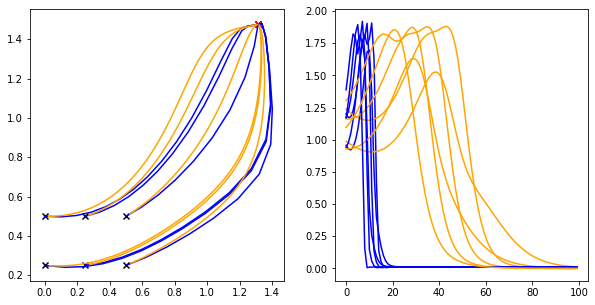

In [182]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
for j in range(3):
    for k in range(1,3):
        iterates = (HO_MVI(j/4,k/4,100,0.001,L=5000))
        ax1.plot(iterates[2],iterates[3],color ='blue' )
        ax2.plot(iterates[-1],color = 'blue')
        
        iterates = first_MVI(j/4,k/4,100,20)
        ax1.plot(iterates[2],iterates[3],color ='orange' )
        ax2.plot(iterates[1],color = 'orange')

        ax1.scatter(j/4,k/4,marker='x',color = 'black')
        ax1.scatter(1.31147,1.47596,marker='x',color = 'red')

In [150]:
iterates[0][-1],iterates[1][-1]

(1.3033147400446337, 1.4751954156084737)